In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense



In [2]:

model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P0')
datetime_index = x_val.index
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    



In [3]:

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 24289.1523 - root_mean_squared_error: 155.5425 - val_loss: 25471.3301 - val_root_mean_squared_error: 159.5974
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9444.7666 - root_mean_squared_error: 96.8519 - val_loss: 11922.6729 - val_root_mean_squared_error: 109.1910
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6003.7524 - root_mean_squared_error: 76.9776 - val_loss: 3080.0378 - val_root_mean_squared_error: 55.4981
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1606.0598 - root_mean_squared_error: 39.9636 - val_loss: 326.9753 - val_root_mean_squared_error: 18.0825
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1379.7582 - root_mean_squared_error: 36.4188 - val_loss: 335.0721 - val_root_mean_squared_error: 18.3050
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 704.6289 - root_mean_squared_error: 26.4820 - val_loss: 417.7268 - val_root_mean_squared_error: 20.4384
Epoch 7/120
18/18 ━

Improved version

## Trying the pipeline with no feature selection dropping

In [4]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P0', drop_features = False)

# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    

In [5]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [6]:
from tensorflow.keras.initializers import GlorotUniform
# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=GlorotUniform(seed=42), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True, clipnorm=1.0)
#optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 23478.3418 - root_mean_squared_error: 152.5924 - val_loss: 25041.8906 - val_root_mean_squared_error: 158.2463
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12167.9404 - root_mean_squared_error: 109.2912 - val_loss: 11641.5879 - val_root_mean_squared_error: 107.8962
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5570.5195 - root_mean_squared_error: 73.9981 - val_loss: 3851.6387 - val_root_mean_squared_error: 62.0616
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1901.1146 - root_mean_squared_error: 43.4277 - val_loss: 833.1645 - val_root_mean_squared_error: 28.8646
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 781.6354 - root_mean_squared_error: 27.8129 - val_loss: 454.3104 - val_root_mean_squared_error: 21.3146
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 578.5660 - root_mean_squared_error: 23.7882 - val_loss: 353.9002 - val_root_mean_squared_error: 18.8122
Epoch 7/120
18/18 

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


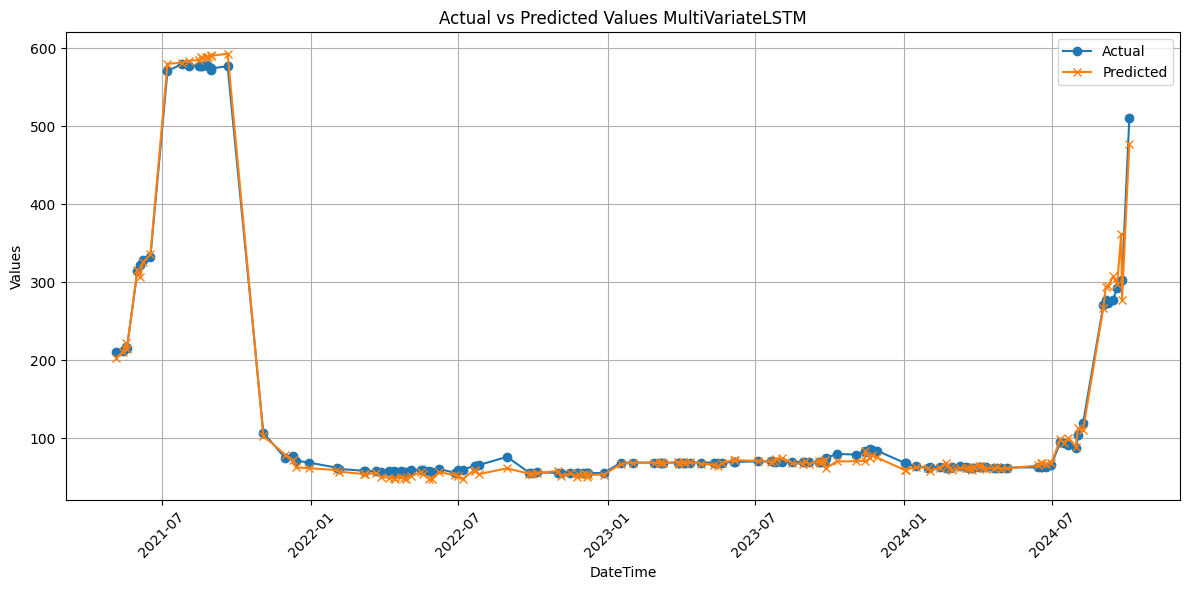

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## FINAL TESTING
- training on val and train
- testing on test

In [88]:
x_train, x_val, x_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column='P0', drop_features=False)
datetime_index = x_test.index
#save these values for later
X_test_last= X_test.sort_index()
X_test_last = X_test_last.tail(10)
datetime_index_final = X_test_last.index
X_test_last = X_test_last.to_numpy()  # Convert DataFrame to NumPy array
X_test_last = X_test_last.reshape(X_test_last.shape[0], 1, X_test_last.shape[1])
y_test_last = y_test.sort_index()
y_test_last = y_test_last.tail(10)

x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# merge train and validation
x_train_combined = np.vstack([x_train, x_val])  # Combine x_train and x_val
y_train_combined = np.concatenate([y_train, y_val])  # Combine y_train and y_val

#reshape
x_train = x_train_combined.reshape(x_train_combined.shape[0], 1, x_train_combined.shape[1])  # [samples, time_steps=1, features]
# Test data
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1]) 

In [89]:
from tensorflow.keras.initializers import GlorotUniform
# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(105, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=GlorotUniform(seed=42), return_sequences=True),
    Dropout(0.4),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    TimeDistributed(Dense(75, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Dropout(0.2),
    TimeDistributed(Dense(55, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True, clipnorm=1.0)
#optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

history = multivariate_lstm.fit(x_train, y_train_combined, epochs=120,
                                validation_data=(x_test, y_test),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final test RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - loss: 27804.9121 - root_mean_squared_error: 166.2045 - val_loss: 19370.7305 - val_root_mean_squared_error: 139.1788
Epoch 2/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13072.6240 - root_mean_squared_error: 113.9346 - val_loss: 5082.6099 - val_root_mean_squared_error: 71.2924
Epoch 3/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3010.2434 - root_mean_squared_error: 54.7438 - val_loss: 1755.4513 - val_root_mean_squared_error: 41.8981
Epoch 4/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1821.5422 - root_mean_squared_error: 42.6016 - val_loss: 1949.2250 - val_root_mean_squared_error: 44.1500
Epoch 5/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1844.5803 - root_mean_squared_error: 42.8309 - val_loss: 1686.5590 - val_root_mean_squared_error: 41.0677
Epoch 6/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1449.7194 - root_mean_squared_error: 37.8230 - val_loss: 2252.5247 - val_root_mean_squared_error: 47.460

In [90]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


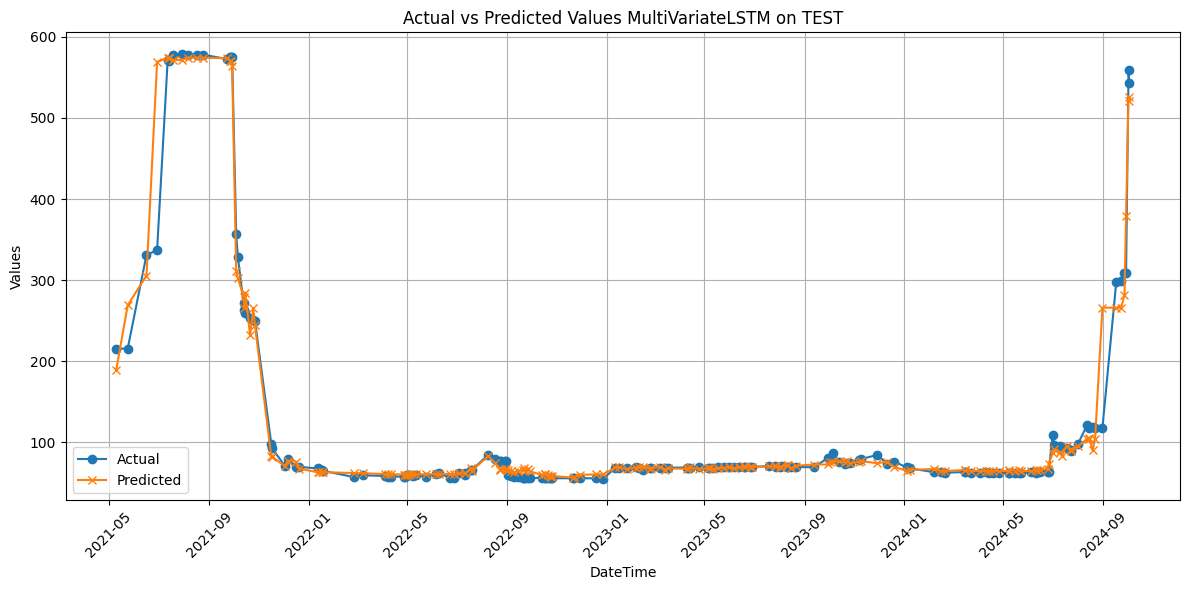

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
y_test_df = pd.DataFrame(y_test, index=datetime_index, columns=['Actual'])
predictions_df = predictions_df.sort_index()
y_test_df = y_test_df.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, y_test_df['Actual'], label='Actual', marker='o')
plt.plot(y_test_df.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM on TEST')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Last 10 values prediction

In [100]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(X_test_last)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


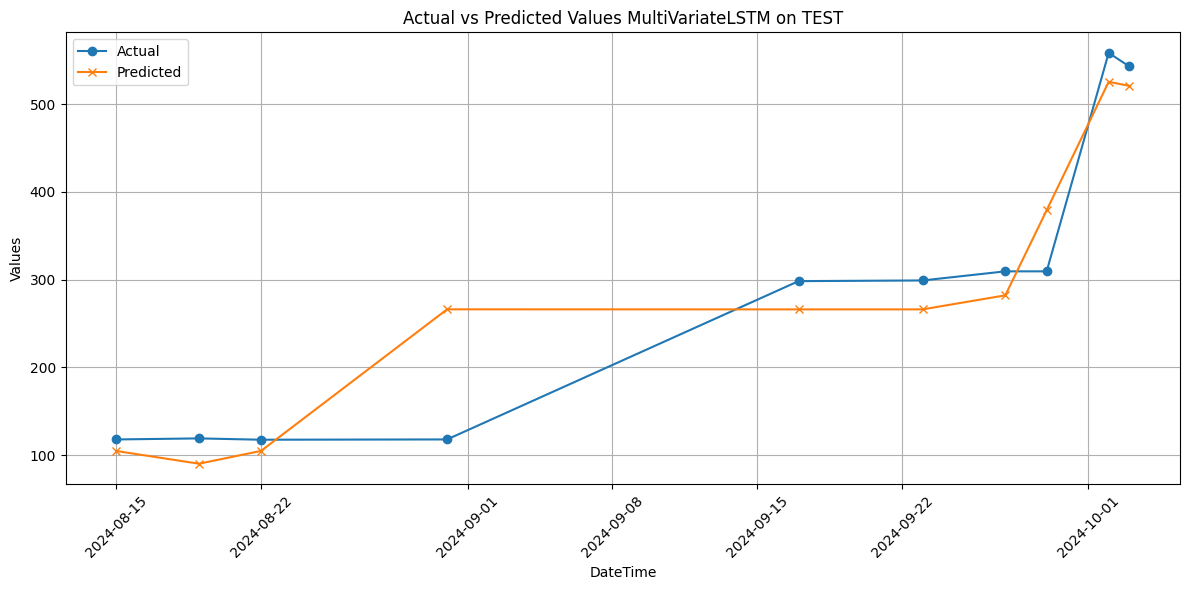

In [112]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index_final, columns=['Predicted'])
predictions_df = predictions_df.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_test_last.index, y_test_last, label='Actual', marker='o')
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM on TEST')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()